In [109]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

In [110]:
def Euler_method(Stock_first,Strike,vol,risk_free,time,N,delta): #delta=time/N: delta t
    global Options_price
    
      
    global Euler_sim
    
    global result
    
    
    number_of_paths=100 #simulation paths (change it every time)
      
    z=10
    
    n=100 # n is a number of simulation in each path. Number of paths must be equal n and delta*n=1 (change it every time)
    
    discrete_step = int(n/z)
    
    key=range(n)  # making indexes
           
    Stock=np.zeros(n) 
    Stock[0]=Stock_first
    
    column_names=[]
    
    Minimum_discrete=[]
    Maximum_discrete=[]
    
    Minimum=[]
    Maximum=[]
    

     
    K=[Strike]* number_of_paths #list of strikes
   
    division_discrete=[] # intermediate variable to make discrete maximum
    
    
    Options_price= pd.DataFrame(columns=['Binary_call','Binary_put','Call_Floating','Put_Floating','Call_Fixed','Put_Fixed','Call_Floating_discrete','Put_Floating_discrete','Call_Fixed_discrete','Put_Fixed_discrete'],index=key)
   
    
    
    
    for i in range(number_of_paths): # name of columns
        try:
            t=f"simulation{i}"
            column_names.append(t)
        except: IndexError
    
    global Euler_sim
    
    Euler_sim = pd.DataFrame(columns=column_names,index=key)  #making monte carlo simulation
    for column in Euler_sim:
        for j in range(n):
            try: 
                Stock[j+1]=Stock[j]*math.exp((risk_free-0.5*vol**2)*delta+vol*np.random.normal(loc=0.0, scale=np.sqrt(delta)))         
                Euler_sim[column][0]=Stock[0]
                Euler_sim[column][j+1]=Stock[j+1]     
            except: IndexError
    
 
    
    
    for column in Euler_sim: # find maximum and minimum for each column
        Minimum.append( Euler_sim[column].min())
        Maximum.append( Euler_sim[column].max())
    
    global last
    last=Euler_sim.iloc[-1] #last Stock price
    last=np.asarray(last)
 
    Maximum=np.asarray(Maximum)
    Minimum=np.asarray(Minimum)
    K=np.asarray(K)
    
    Binary_call=np.zeros(n)
    Binary_put=np.zeros(n)
    
    for i in range(len(last)):  
        try:
            if last[i] > K[i]:
                Binary_call[i]=1
            elif last[i] < K[i]:
                Binary_call[i]=0
        except:IndexError
   
    for i in range(len(last)):
        try:
            if last[i] <K[i]:
                Binary_put[i]=1
            elif last[i] > K[i]:
                Binary_put[i]=0
        except: IndexError
   
    for column in  Euler_sim:  # take values from each columns with the step z
        for i in range(0, n, z):
              division_discrete.append( Euler_sim[column][i])        
    
    def divide_chunks(l, discrete_step): # function to divide a list in blocks of discrete_step size
      
    # looping till length l 
        for i in range(0, len(l),discrete_step):  
            yield l[i:i + discrete_step] 
  
    # How many elements each 
    # list should have 
   
  
    division_discrete = list(divide_chunks(  division_discrete, discrete_step ))         
   
    division_discrete=np.asarray(division_discrete)
    
    for i in range(len(division_discrete)):
        Minimum_discrete.append(division_discrete[i].max())
        Maximum_discrete.append(division_discrete[i].min())
        
       
    Minimum_discrete=np.asarray(Minimum_discrete) # changing data format
    Maximum_discrete=np.asarray(Maximum_discrete)
       
    global Call_Floating
    
    Call_Floating=math.exp(-risk_free)*(last-Minimum)  # finding value of options with fixed and floating strike with continious measurment of maximum and minimum
    Put_Floating=math.exp(-risk_free)*(Maximum-last)
    Call_Fixed=math.exp(-risk_free)*(Maximum-K)
    Put_Fixed=math.exp(-risk_free)*(K-Minimum)
   
     
    Call_Floating_discrete=math.exp(-risk_free)*(last- Maximum_discrete)  # finding value of options with fixed and floating strike with discrete measurment of maximum and minimum
    Put_Floating_discrete=math.exp(-risk_free)*(  Minimum_discrete-last)
    Call_Fixed_discrete=math.exp(-risk_free)*(  Minimum_discrete-K)
    Put_Fixed_discrete=math.exp(-risk_free)*(K- Maximum_discrete)
    
    
    Binary_put=math.exp(-risk_free)*Binary_put  #finding Binaries
    Binary_call=math.exp(-risk_free)*Binary_call
    
   
    for index, values in np.ndenumerate(Binary_put): 
        Options_price['Binary_put'][index]=values
    for index, values in np.ndenumerate(Binary_call):
        Options_price['Binary_call'][index]=values
    
    for index, values in np.ndenumerate(Call_Floating): # writing everything in dataframe
        Options_price['Call_Floating'][index]=values
    for index, values in np.ndenumerate(Put_Floating):
        Options_price['Put_Floating'][index]=values
    for index, values in np.ndenumerate(Call_Fixed):
        Options_price['Call_Fixed'][index]=values
    for index, values in np.ndenumerate(Put_Fixed):
        Options_price['Put_Fixed'][index]=values
    
    for index, values in np.ndenumerate(Call_Floating_discrete):
        Options_price['Call_Floating_discrete'][index]=values
       
                
    for index, values in np.ndenumerate(Put_Floating_discrete):
        Options_price['Put_Floating_discrete'][index]=values
         
    
    for index, values in np.ndenumerate(Call_Fixed_discrete):
        Options_price['Call_Fixed_discrete'][index]=values
    
    
    for index, values in np.ndenumerate(Put_Fixed_discrete):
        Options_price['Put_Fixed_discrete'][index]=values
    


    
    Options_price=Options_price.where(Options_price>0, 0) # all values less than zero mae zeros
    
 
   
    
    Options=[]  # making final result
    for i in Options_price:
            Options.append(Options_price[i].mean())
            print(i)       

            

    result=pd.DataFrame([Options],columns=['Binary_call' ,'Binary_put','Call_Floating','Put_Floating','Call_Fixed','Put_Fixed','Call_Floating_discrete','Put_Floating_discrete','Call_Fixed_discrete','Put_Fixed_discrete']) 
  

    return(Options_price,result,Euler_sim, )
   

In [111]:
Euler_method(Stock_first=100,Strike=105,vol=0.2,risk_free=0.05,time=1,N=100,delta=1/N)


Binary_call
Binary_put
Call_Floating
Put_Floating
Call_Fixed
Put_Fixed
Call_Floating_discrete
Put_Floating_discrete
Call_Fixed_discrete
Put_Fixed_discrete


(   Binary_call Binary_put Call_Floating Put_Floating Call_Fixed Put_Fixed  \
 0            0   0.951229       5.99015      1.03981          0   11.7861   
 1            0   0.951229       1.27101      4.94853          0   9.44099   
 2     0.951229          0       12.0273            0    6.67113    5.3562   
 3            0   0.951229      0.802899      5.72096          0   10.3543   
 4            0   0.951229        10.075     0.787804          0   11.6362   
 5            0   0.951229       4.59833      7.79959    4.92975   7.46816   
 6            0   0.951229       5.20541       4.6254          0   12.8549   
 7            0   0.951229      0.156997      6.93658   0.687272    6.4063   
 8            0   0.951229      0.904662      5.91393          0   10.9875   
 9            0   0.951229       3.01003      8.21681          0   13.9591   
 10    0.951229          0       12.6347     0.757943     7.4945   5.89815   
 11    0.951229          0       10.2059            0    2.83142

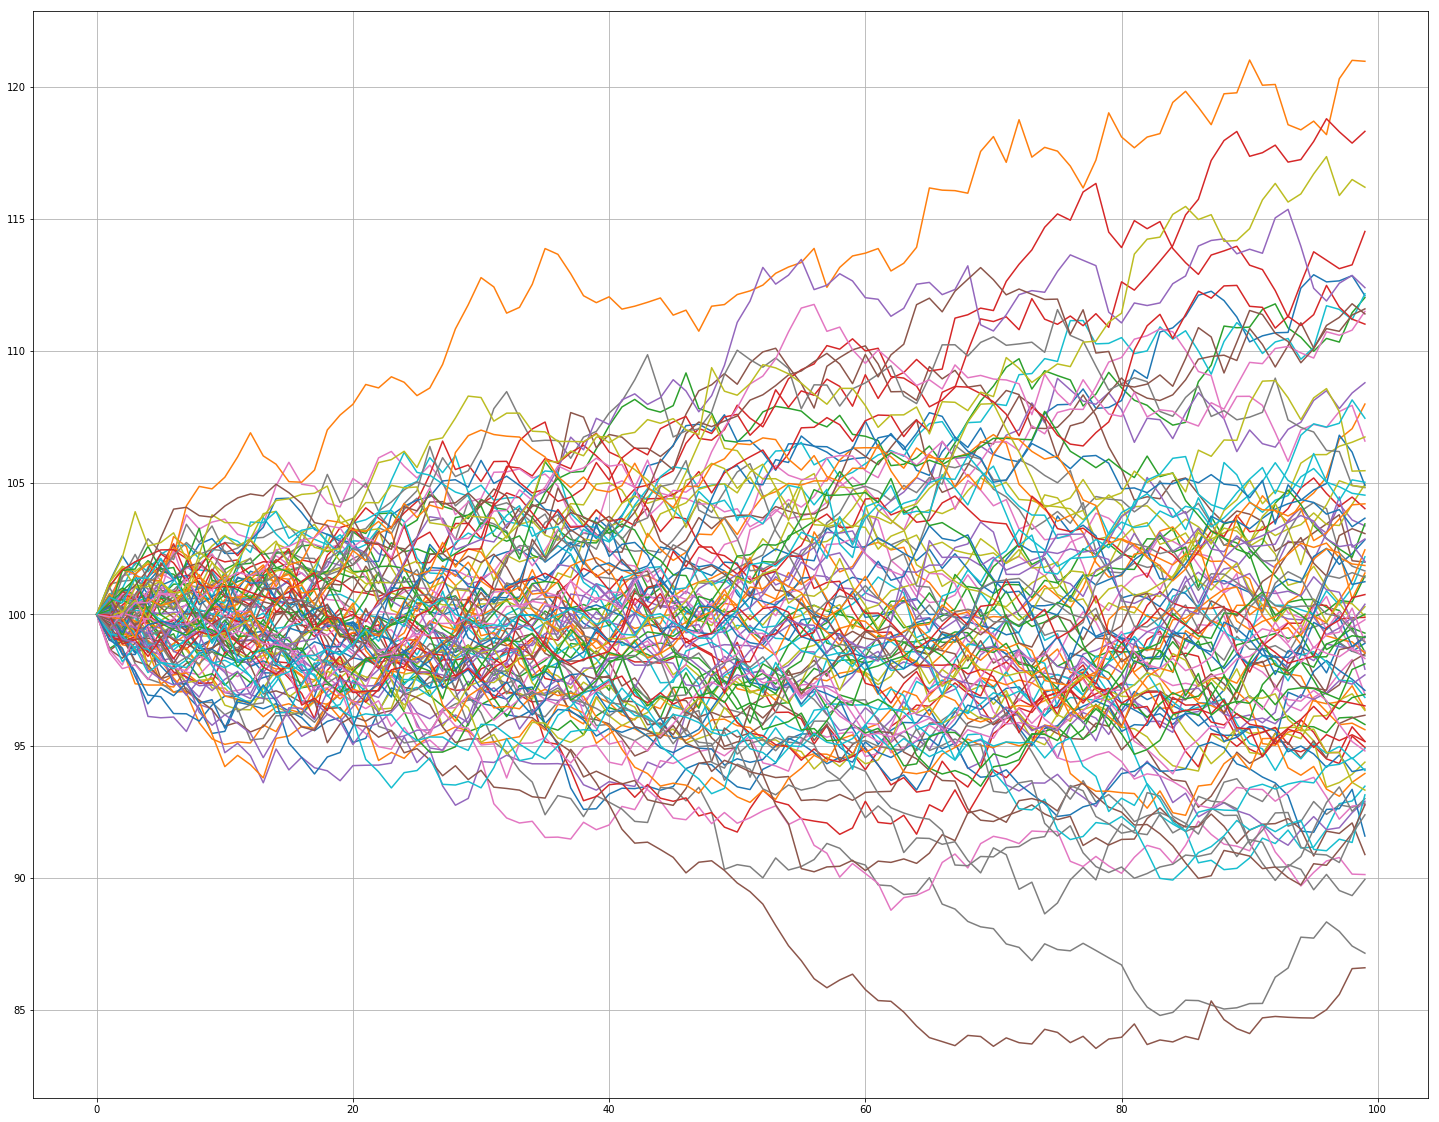

In [112]:
Euler_sim.plot(legend=False, grid=True, figsize=(25,20) )




In [113]:
result

,Binary_call,Binary_put,Call_Floating,Put_Floating,Call_Fixed,Put_Fixed,Call_Floating_discrete,Put_Floating_discrete,Call_Fixed_discrete,Put_Fixed_discrete
0,0.180734,0.770496,4.749723,4.046734,1.636613,9.035766,4.109069,3.412955,1.241745,8.274365
